# Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the dataset

In [ ]:
dataset = pd.read_csv('Language Detection.csv')
X = dataset["Text"]
y = dataset["Language"]

In [ ]:
dataset["Language"].value_counts()

Language
English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: count, dtype: int64

# Label Encoding


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
print(y)

[3 3 3 ... 9 9 9]


# Cleaning the texts

In [ ]:
import re
corpus = []
for text in X:
  text = re.sub(r'[!@#$(), n"%^*?:;~`0-9]', ' ', text)
  text = re.sub(r'[[]]', ' ', text)
  text = text.lower()
  corpus.append(text)

<ipython-input-11-0b1214b2545a>:5: FutureWarning: Possible nested set at position 1
  text = re.sub(r'[[]]', ' ', text)


In [ ]:
print(corpus)

[' nature  i  the broadest se se  is the  atural  physical  material world or u iverse.', ' nature  ca  refer to the phe ome a of the physical world  a d also to life i  ge eral.', 'the study of  ature is a large  if  ot the o ly  part of scie ce.', 'although huma s are part of  ature  huma  activity is ofte  u derstood as a separate category from other  atural phe ome a.', '[ ] the word  ature is borrowed from the old fre ch  ature a d is derived from the lati  word  atura  or  esse tial qualities  i  ate dispositio    a d i  a cie t times  literally mea t  birth .', '[ ] i  a cie t philosophy   atura is mostly used as the lati  tra slatio  of the greek word physis  φύσις   which origi ally related to the i tri sic characteristics that pla ts  a imals  a d other features of the world develop of their ow  accord.', '[ ][ ] \nthe co cept of  ature as a whole  the physical u iverse  is o e of several expa sio s of the origi al  otio  [ ] it bega  with certai  core applicatio s of the wor

# Creating the Bag of Words Model

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()

# Splitting the dataset in Training Set and Test Set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Training the Model on the Training Set

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

# Predicting the Test set Results

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[13 13]
 [16 16]
 [12 12]
 ...
 [ 3  3]
 [13 13]
 [ 5  5]]


# Model Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
print("Accuracy is:", ac)

Accuracy is: 0.973404255319149


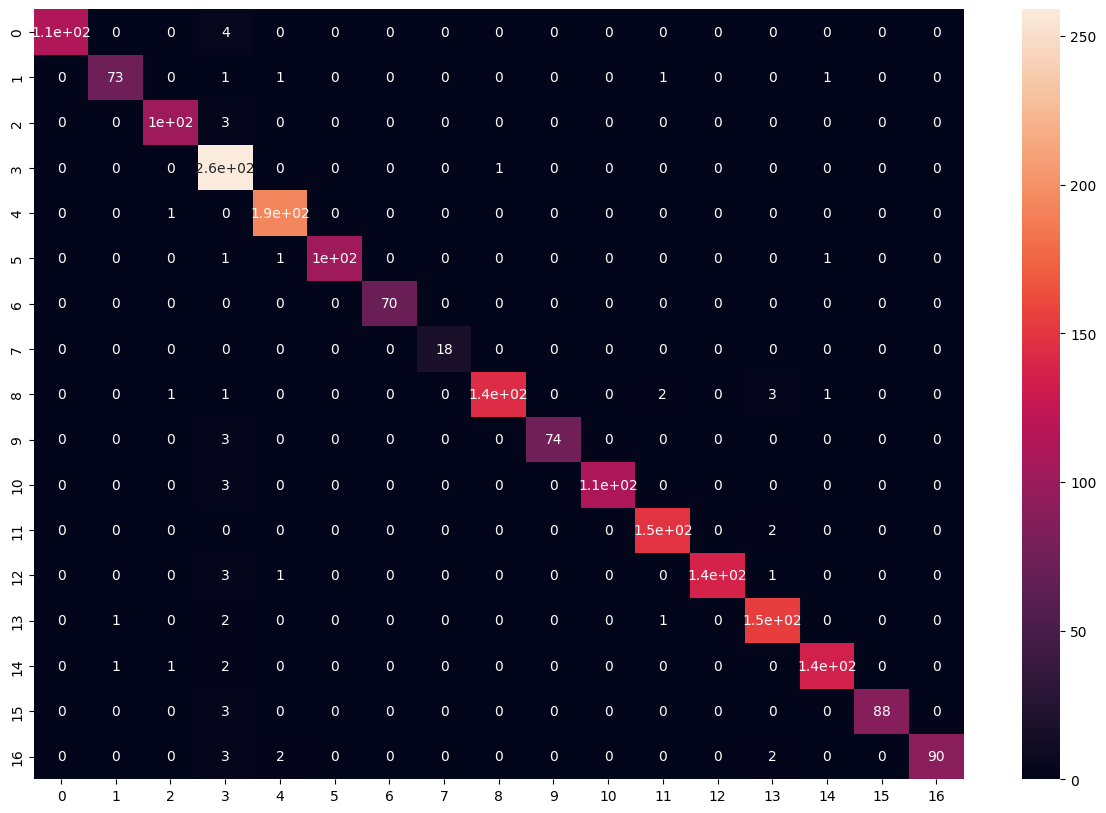

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(cm, annot = True)
plt.show()

# Predicting with more Data

In [ ]:
def predict(text):
    x = cv.transform([text]).toarray()
    lang = classifier.predict(x)
    lang = le.inverse_transform(lang)
    print("The langauge is:",lang[0])

In [ ]:
predict(" Nature, in the broadest sense, is the natural, physical, material world or universe.")

The langauge is: English


In [ ]:
predict("ಮತ್ತು ಅವರು ನನ್ನನ್ನು ಮದುವೆಯಾಗಲು ಬಯಸಿದ್ದರು ಅವರು ಚಿನ್ನದ ಗಾಡಿಯಲ್ಲಿ ಬಂದಿದ್ದರು ಮತ್ತು ಅವರು ಮೇಲಿನಿಂದ ಕೆಳಕ್ಕೆ ಮತ್ತು ಚಿನ್ನವನ್ನು ಧರಿಸಿದ್ದರು ಮತ್ತು ಏನು ಸಿಲ್ಲಿ ಕನಸು.")

The langauge is: Kannada


In [ ]:
predict("und du weißt, das Beste daran war, als ich in meinem Hochzeitskleid war, das natürlich auch aus Gold war.")

The langauge is: German
